# Prediction Of Car Prices

## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

The company wants to know: 

* Which variables are significant in predicting the price of a car.
* How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Automobile.csv')
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [4]:
data.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

In [5]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

## Statistical Parameters of Numerical Columns

In [6]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Exploratory Data Analysis

### Price : Target Variable

In [7]:
data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

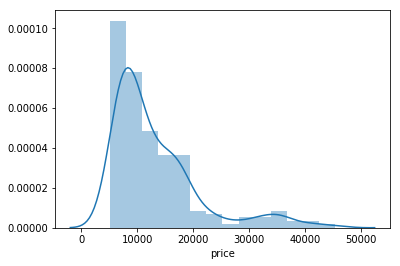

In [8]:
sns.distplot(data['price'])

$Inference :$
* Mean and median of price are significantly different.
* Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
* Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.

### Symboling

It's assigned insurance risk rating
* A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

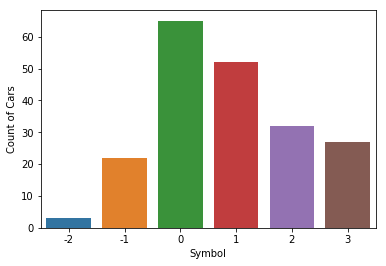

In [9]:
plt1 = sns.countplot(data['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()

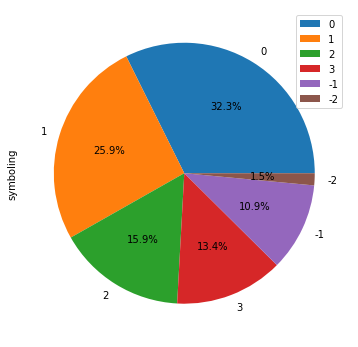

In [10]:
sym = pd.DataFrame(data['symboling'].value_counts())
sym.plot.pie(subplots=True, autopct='%1.1f%%',figsize=(15,6))
plt.show()

Let's see average price of cars in each symbol category. 

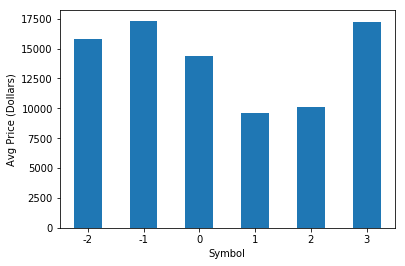

In [11]:
plt1 = data[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation=0)
plt.show()

$Inference :$
* More than 50% of cars are with symbol 0 or 1.
* Average price of car is lower for 0,1 & 2 symbol category.

### Car Name (make)

In [12]:
data['brand']=data.make.str.upper()

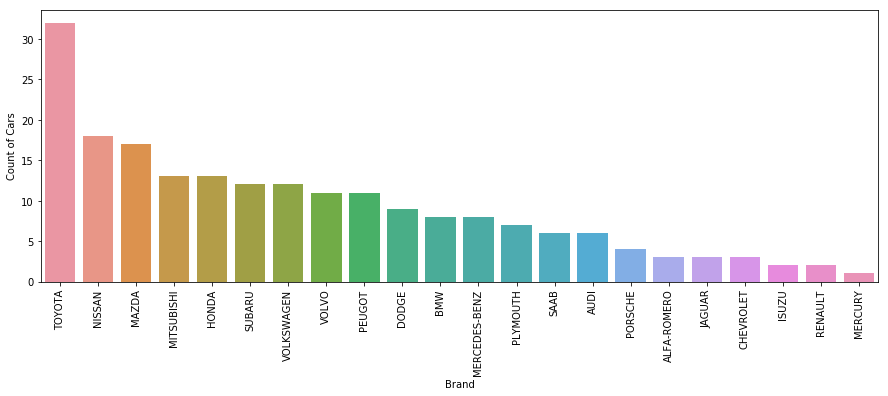

In [13]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['brand'], order=pd.value_counts(data['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()

Let's see average price of each company

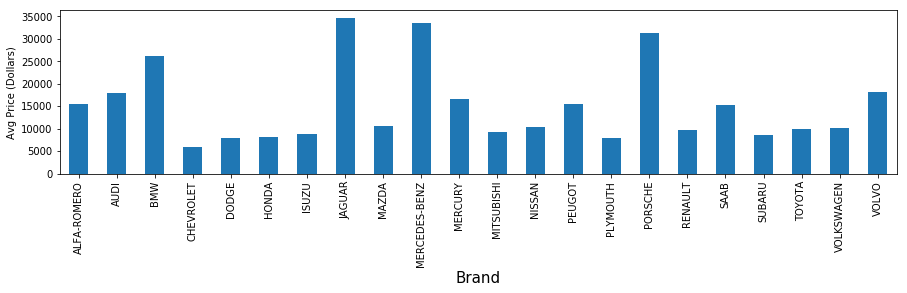

In [14]:
plt1 = data[['brand','price']].groupby("brand").mean().plot(kind='bar',legend = False,figsize=(15,3))
plt1.set_xlabel("Brand",fontsize=15)
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation=90)
plt.show()

### Fuel Type

Let's see how price varies with  Fuel Type

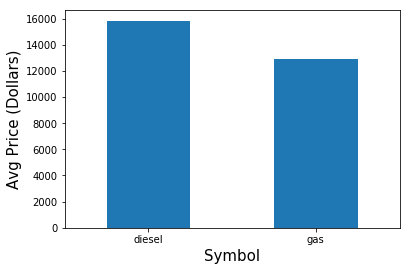

In [15]:
plt1 = data[['fuel_type','price']].groupby("fuel_type").mean().plot(kind='bar',legend = False)
plt1.set_xlabel("Symbol",fontsize=15)
plt1.set_ylabel("Avg Price (Dollars)",fontsize=15)
plt.xticks(rotation=0)
plt.show()

$ Inference :$
* Diesel cars are priced more than gas cars.

### Aspiration

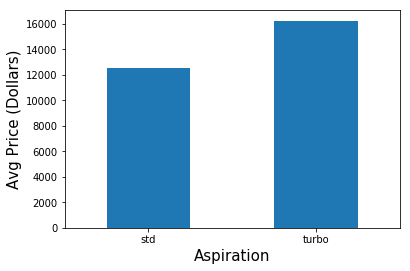

In [16]:
plt1 = data[['aspiration','price']].groupby("aspiration").mean().plot(kind='bar',legend = False)
plt1.set_xlabel("Aspiration",fontsize=15)
plt1.set_ylabel("Avg Price (Dollars)",fontsize=15)
plt.xticks(rotation=0)
plt.show()

$Inference :$
* Cars with turbo aspiration engine are priced more than standard ones.

### Number of Doors

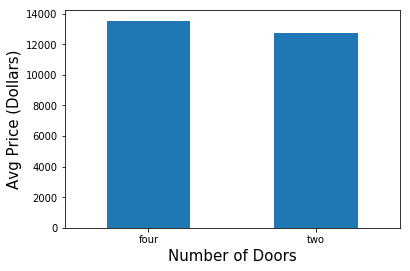

In [17]:
plt1 = data[['number_of_doors','price']].groupby("number_of_doors").mean().plot(kind='bar',legend = False)
plt1.set_xlabel("Number of Doors",fontsize=15)
plt1.set_ylabel("Avg Price (Dollars)",fontsize=15)
plt.xticks(rotation=0)
plt.show()

$Inference :$
* Number of doors doesn't seem to have much effect on price.

### Car Body

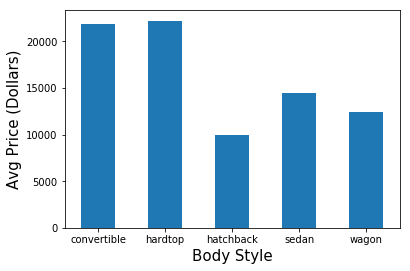

In [18]:
plt1 = data[['body_style','price']].groupby("body_style").mean().plot(kind='bar',legend = False)
plt1.set_xlabel("Body Style",fontsize=15)
plt1.set_ylabel("Avg Price (Dollars)",fontsize=15)
plt.xticks(rotation=0)
plt.show()

$ Inference : $
* Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

### Drivewheel

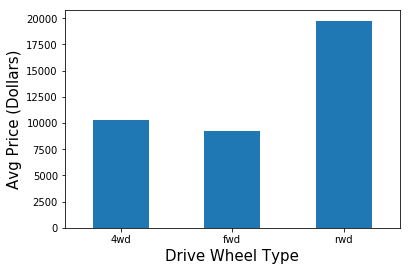

In [19]:
plt1 = data[['drive_wheels','price']].groupby("drive_wheels").mean().plot(kind='bar',legend = False)
plt1.set_xlabel("Drive Wheel Type",fontsize=15)
plt1.set_ylabel("Avg Price (Dollars)",fontsize=15)
plt.xticks(rotation=0)
plt.show()

$ Inference :$
* Cars with Rear wheel drive have a higher price value.

### Engine Size

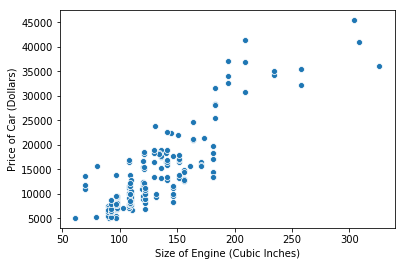

In [20]:
sns.scatterplot(x = 'engine_size', y = 'price', data = data)
plt.xlabel('Size of Engine (Cubic Inches)')
plt.ylabel('Price of Car (Dollars)')
plt.show()

$ Inference :$
* Size of engine has positive corre;ation with price.

### Car Dimensions

Let's see how price varies with Car's length, width,height and weight.

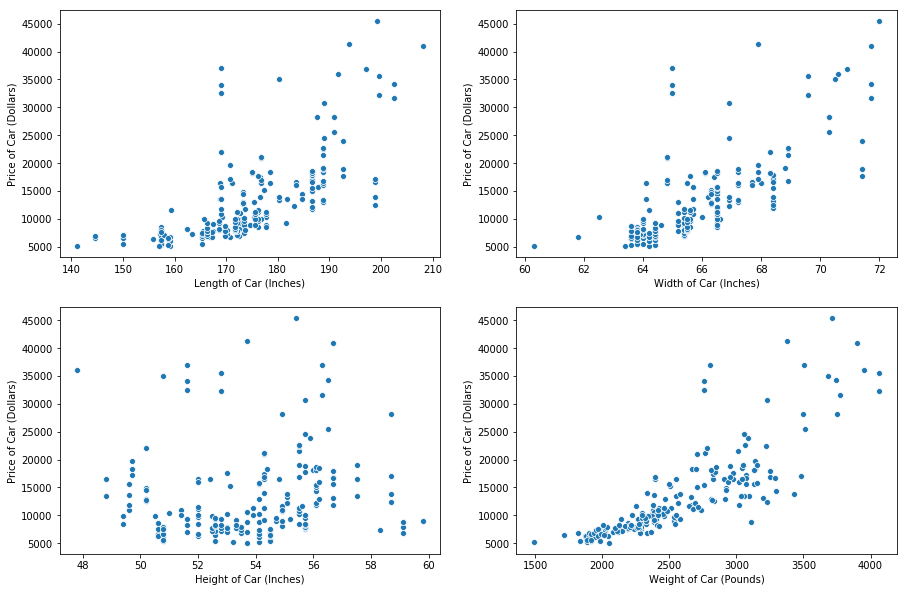

In [21]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1=sns.scatterplot(x = 'length', y = 'price', data = data,ax=axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'width', y = 'price', data = data, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'height', y = 'price', data = data, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curb_weight', y = 'price', data = data, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.show()


$Inference :$
* Length width and weight of the car is positively related with the price.
* There is not much of a correlation with Height of the car with price.

### Engine Specifications ( Engine Type, Cylinder, Fuel System)

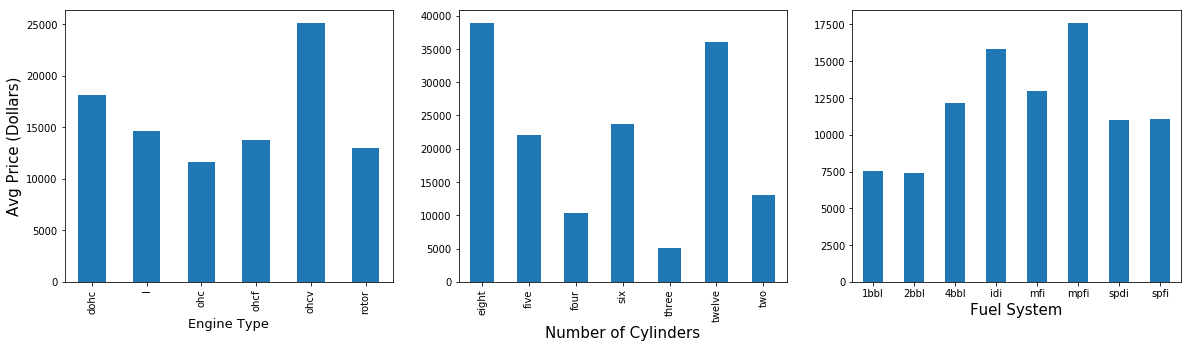

In [22]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
plt1=data[['engine_type','price']].groupby("engine_type").mean().plot(kind='bar',legend = False,ax=axs[0])
plt1.set_xlabel("Engine Type",fontsize=13)
plt1.set_ylabel("Avg Price (Dollars)",fontsize=15)

plt2=data[['number_of_cylinders','price']].groupby("number_of_cylinders").mean().plot(kind='bar',legend = False,ax=axs[1])
plt2.set_xlabel("Number of Cylinders",fontsize=15)

plt3=data[['fuel_system','price']].groupby("fuel_system").mean().plot(kind='bar',legend = False,ax=axs[2])
plt3.set_xlabel("Fuel System",fontsize=15)
plt.xticks(rotation=0)
plt.show()

$Inference :$
* DOHCV and OHCV engine types are priced high.
* Eight and twelve cylinder cars have higher price.
* IDI and MPFI fuel system have higher price.


### City Mileage & Highway Mileage

A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.

In [23]:
data['mileage'] = data['city_mpg']*0.55 + data['highway_mpg']*0.45

Let's see how price varies with mileage.

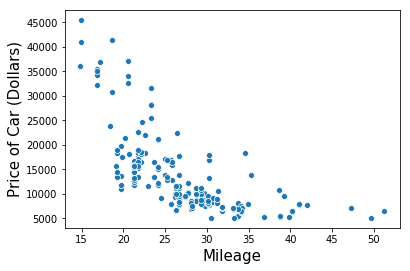

In [24]:
sns.scatterplot(x = 'mileage', y = 'price', data = data)
plt.xlabel('Mileage',fontsize=15)
plt.ylabel('Price of Car (Dollars)',fontsize=15)
plt.show()

$ Inference :$ 
* Mileage has a negative correlation with price.

### Brand Category

In [25]:
brand_avg_price=data[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})

In [26]:
data = data.merge(brand_avg_price, on = 'brand')

In [27]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

### Brand Category - Mileage

It is expected that luxury brands don't care about mileage. Let's find out how price varies with brand category and mileage.

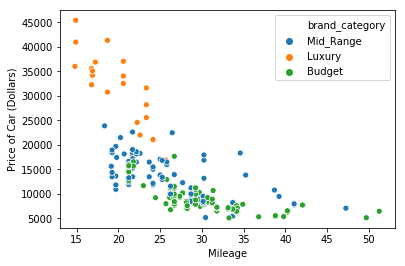

In [28]:
sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = data)
plt.xlabel('Mileage')
plt.ylabel('Price of Car (Dollars)')
plt.show()

### Brand Category - Horse Power

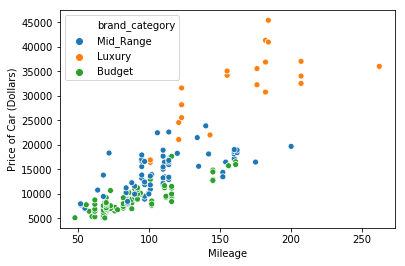

In [29]:
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = data)
plt.xlabel('Mileage')
plt.ylabel('Price of Car (Dollars)')
plt.show()

### Mileage - Fuel Type

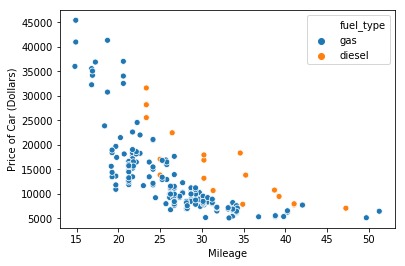

In [30]:
sns.scatterplot(x = 'mileage', y = 'price', hue = 'fuel_type', data = data)
plt.xlabel('Mileage')
plt.ylabel('Price of Car (Dollars)')
plt.show()

### Horse Power - Fuel Type

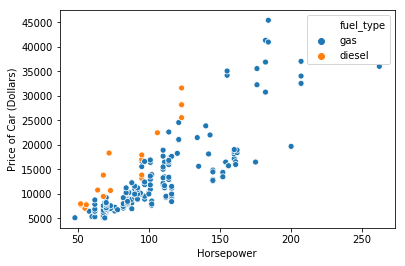

In [31]:
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fuel_type', data = data)
plt.xlabel('Horsepower')
plt.ylabel('Price of Car (Dollars)')
plt.show()

## Summary Analysis :

__From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.__ <br>
__The most important driver variable for prediction of price are:-__

1. Brand Category
2. Fuel Type
3. Aspiration
4. Car Body
5. Drive Wheel
6. Car Length
7. Car Width
8. Curb weight
9. Engine Type
10. Cylinder Number
11. Engine Size
12. Horsepower
13. Mileage


In [32]:
df = data[['fuel_type', 'aspiration', 'body_style', 'drive_wheels', 'length', 'width', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'horsepower', 'price', 'brand_category', 'mileage']]

In [33]:
df.head()

,fuel_type,aspiration,body_style,drive_wheels,length,width,curb_weight,engine_type,number_of_cylinders,engine_size,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,168.8,64.1,2548,dohc,four,130,111,13495,Mid_Range,23.70
1,gas,std,convertible,rwd,168.8,64.1,2548,dohc,four,130,111,16500,Mid_Range,23.70
2,gas,std,hatchback,rwd,171.2,65.5,2823,ohcv,six,152,154,16500,Mid_Range,22.15
3,gas,std,sedan,fwd,176.6,66.2,2337,ohc,four,109,102,13950,Mid_Range,26.70
4,gas,std,sedan,4wd,176.6,66.4,2824,ohc,five,136,115,17450,Mid_Range,19.80


### Visualising Numerical Variables

Let's make a pairplot of all the numeric variables.

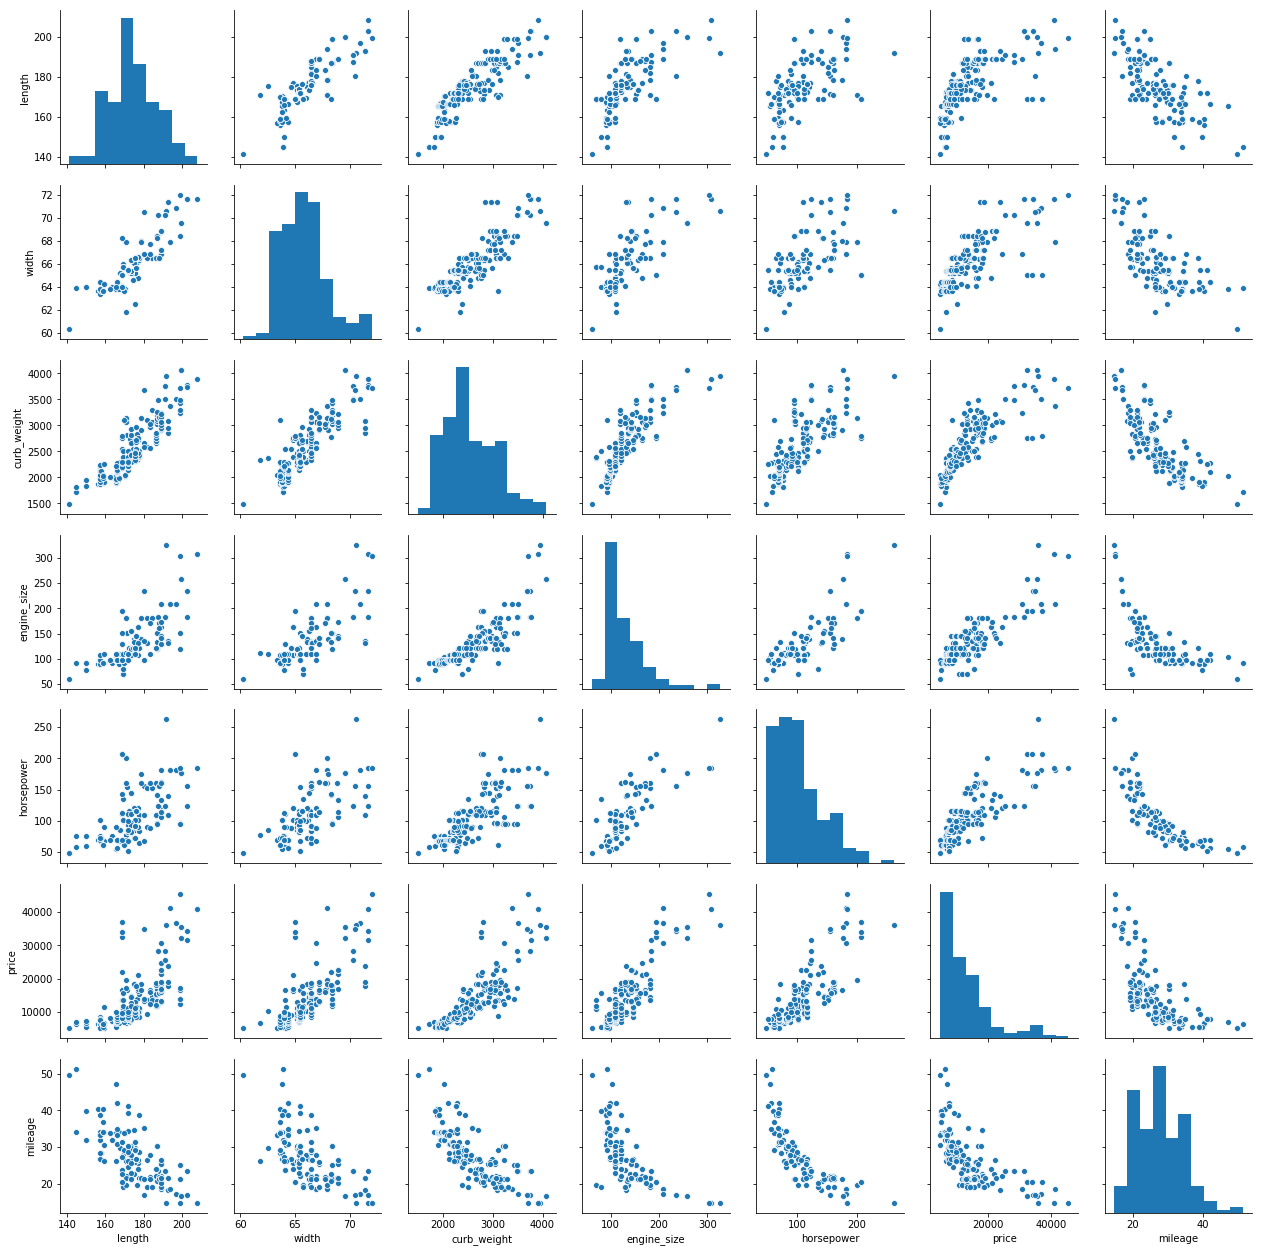

In [34]:
sns.pairplot(df)
plt.show()

### Visualising Categorical Variables.

Let's make a boxplot for categorical variables.

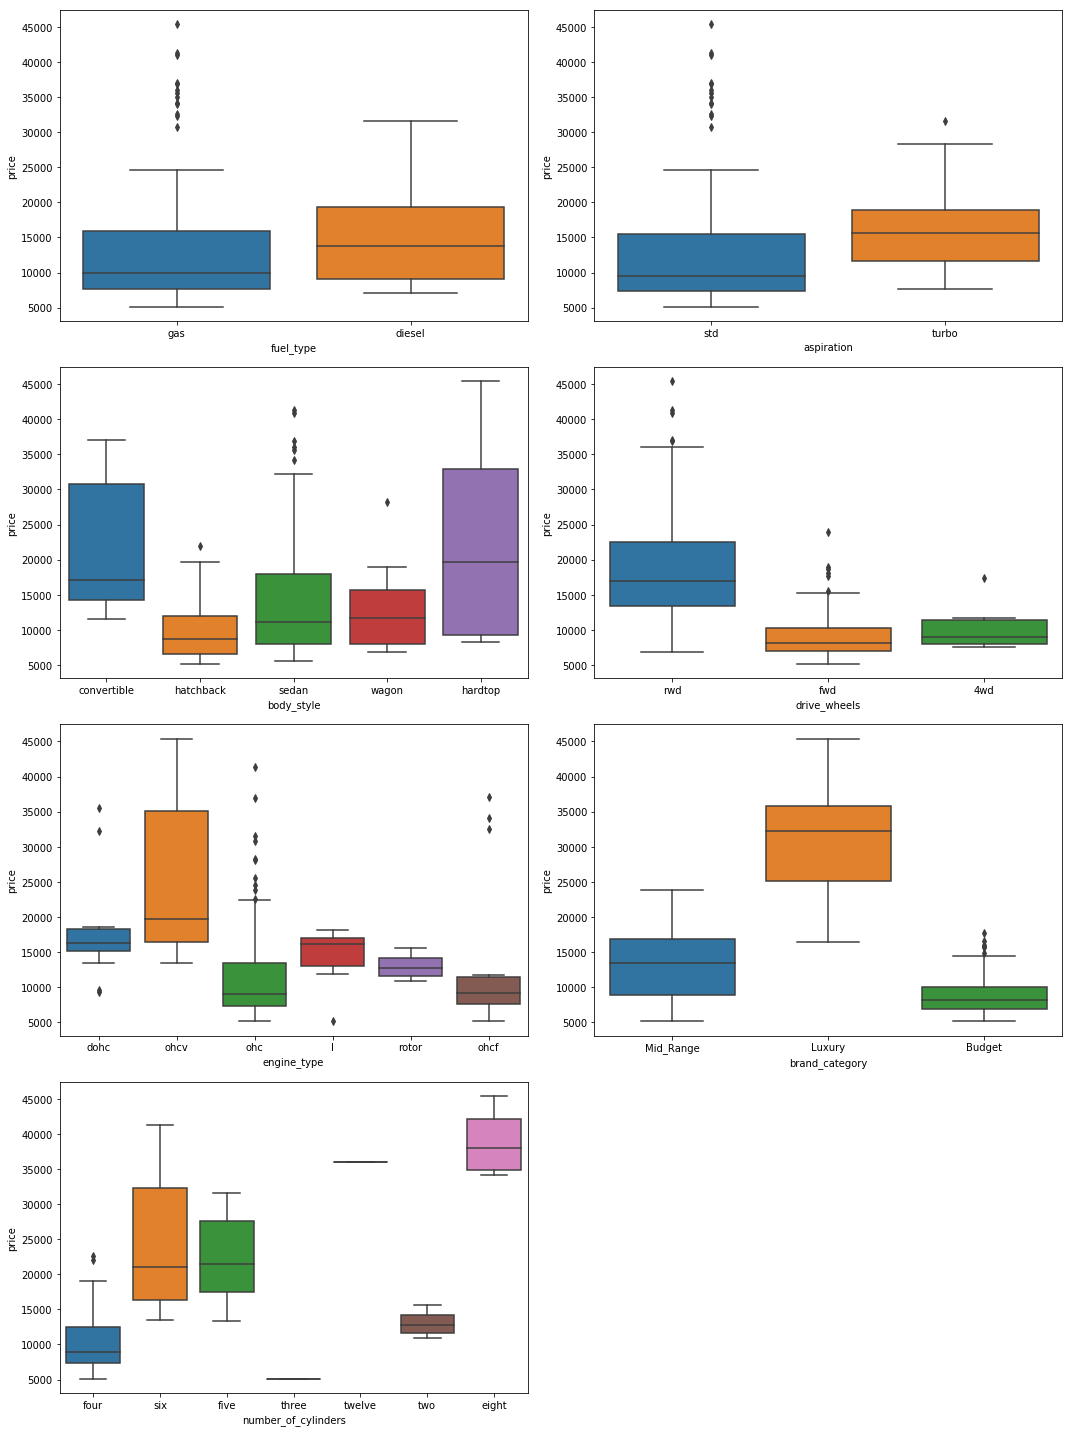

In [35]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fuel_type', y = 'price', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'body_style', y = 'price', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'drive_wheels', y = 'price', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'engine_type', y = 'price', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'number_of_cylinders', y = 'price', data = df)
plt.tight_layout()
plt.show()

## Linear Regression

### Creating Dummy Variables

Let's create dummy variables to change categorical variable into numerical variable.

In [36]:
df.select_dtypes(include='object').head(0)

,fuel_type,aspiration,body_style,drive_wheels,engine_type,number_of_cylinders,brand_category


In [37]:
cylinder_no = pd.get_dummies(df['number_of_cylinders'], drop_first = True)
df = pd.concat([df, cylinder_no], axis = 1)

In [38]:
price_category = pd.get_dummies(df['brand_category'], drop_first = True)
df = pd.concat([df, price_category], axis = 1)

In [39]:
enginetype = pd.get_dummies(df['engine_type'], drop_first = True)
df = pd.concat([df, enginetype], axis = 1)

In [40]:
drive_wheel = pd.get_dummies(df['drive_wheels'], drop_first = True)
df = pd.concat([df, drive_wheel], axis = 1)

In [41]:
car_body = pd.get_dummies(df['body_style'], drop_first = True)
df = pd.concat([df, car_body], axis = 1)

In [42]:
asp = pd.get_dummies(df['aspiration'], drop_first = True)
df = pd.concat([df, asp], axis = 1)

In [43]:
fueltype = pd.get_dummies(df['fuel_type'], drop_first = True)
df = pd.concat([df, fueltype], axis = 1)

In [44]:
df.head()

,fuel_type,aspiration,body_style,drive_wheels,length,width,curb_weight,engine_type,number_of_cylinders,engine_size,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,gas,std,convertible,rwd,168.8,64.1,2548,dohc,four,130,...,0,0,0,1,0,0,0,0,0,1
1,gas,std,convertible,rwd,168.8,64.1,2548,dohc,four,130,...,0,0,0,1,0,0,0,0,0,1
2,gas,std,hatchback,rwd,171.2,65.5,2823,ohcv,six,152,...,1,0,0,1,0,1,0,0,0,1
3,gas,std,sedan,fwd,176.6,66.2,2337,ohc,four,109,...,0,0,1,0,0,0,1,0,0,1
4,gas,std,sedan,4wd,176.6,66.4,2824,ohc,five,136,...,0,0,0,0,0,0,1,0,0,1


In [45]:
df=df.drop(['fuel_type','aspiration','body_style','drive_wheels','engine_type','number_of_cylinders','brand_category'],axis=1)

In [46]:
df.head()

,length,width,curb_weight,engine_size,horsepower,price,mileage,five,four,six,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,168.8,64.1,2548,130,111,13495,23.70,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,168.8,64.1,2548,130,111,16500,23.70,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,171.2,65.5,2823,152,154,16500,22.15,0,0,1,...,1,0,0,1,0,1,0,0,0,1
3,176.6,66.2,2337,109,102,13950,26.70,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,176.6,66.4,2824,136,115,17450,19.80,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
df.shape

(201, 28)

### Splitting Data into Training and Testing Datasets

In [48]:
from sklearn.model_selection import train_test_split

df_train , df_test = train_test_split(df , train_size = 0.7, random_state = 100)

Due to the dummy variables being either 0 and 1. The other variables are to be scaled to have acomparable scale.

### Re-Scaling Features

*__Feature Scaling using MinMax scaler__*


In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars=['curb_weight','length','width','engine_size','horsepower','mileage','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [50]:
df.head()

,length,width,curb_weight,engine_size,horsepower,price,mileage,five,four,six,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,168.8,64.1,2548,130,111,13495,23.70,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,168.8,64.1,2548,130,111,16500,23.70,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,171.2,65.5,2823,152,154,16500,22.15,0,0,1,...,1,0,0,1,0,1,0,0,0,1
3,176.6,66.2,2337,109,102,13950,26.70,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,176.6,66.4,2824,136,115,17450,19.80,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [51]:
df.describe()

,length,width,curb_weight,engine_size,horsepower,price,mileage,five,four,six,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,174.200995,65.889055,2555.666667,126.875622,103.263682,13207.129353,27.657463,0.049751,0.781095,0.119403,...,0.064677,0.019900,0.587065,0.373134,0.039801,0.338308,0.467662,0.124378,0.179104,0.900498
std,12.322175,2.101471,517.296727,41.546834,37.389372,7947.066342,6.553533,0.217973,0.414537,0.325072,...,0.246568,0.140007,0.493591,0.484845,0.195979,0.474315,0.500199,0.330836,0.384397,0.300083
min,141.100000,60.300000,1488.000000,61.000000,48.000000,5118.000000,14.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.800000,64.100000,2169.000000,98.000000,70.000000,7775.000000,22.150000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,173.200000,65.500000,2414.000000,120.000000,95.000000,10295.000000,26.700000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,183.500000,66.600000,2926.000000,141.000000,116.000000,16500.000000,31.800000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,208.100000,72.000000,4066.000000,326.000000,262.000000,45400.000000,51.250000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df.columns

Index(['length', 'width', 'curb_weight', 'engine_size', 'horsepower', 'price',
       'mileage', 'five', 'four', 'six', 'three', 'twelve', 'two', 'Luxury',
       'Mid_Range', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'turbo', 'gas'],
      dtype='object')

### Correlation using Heatmap

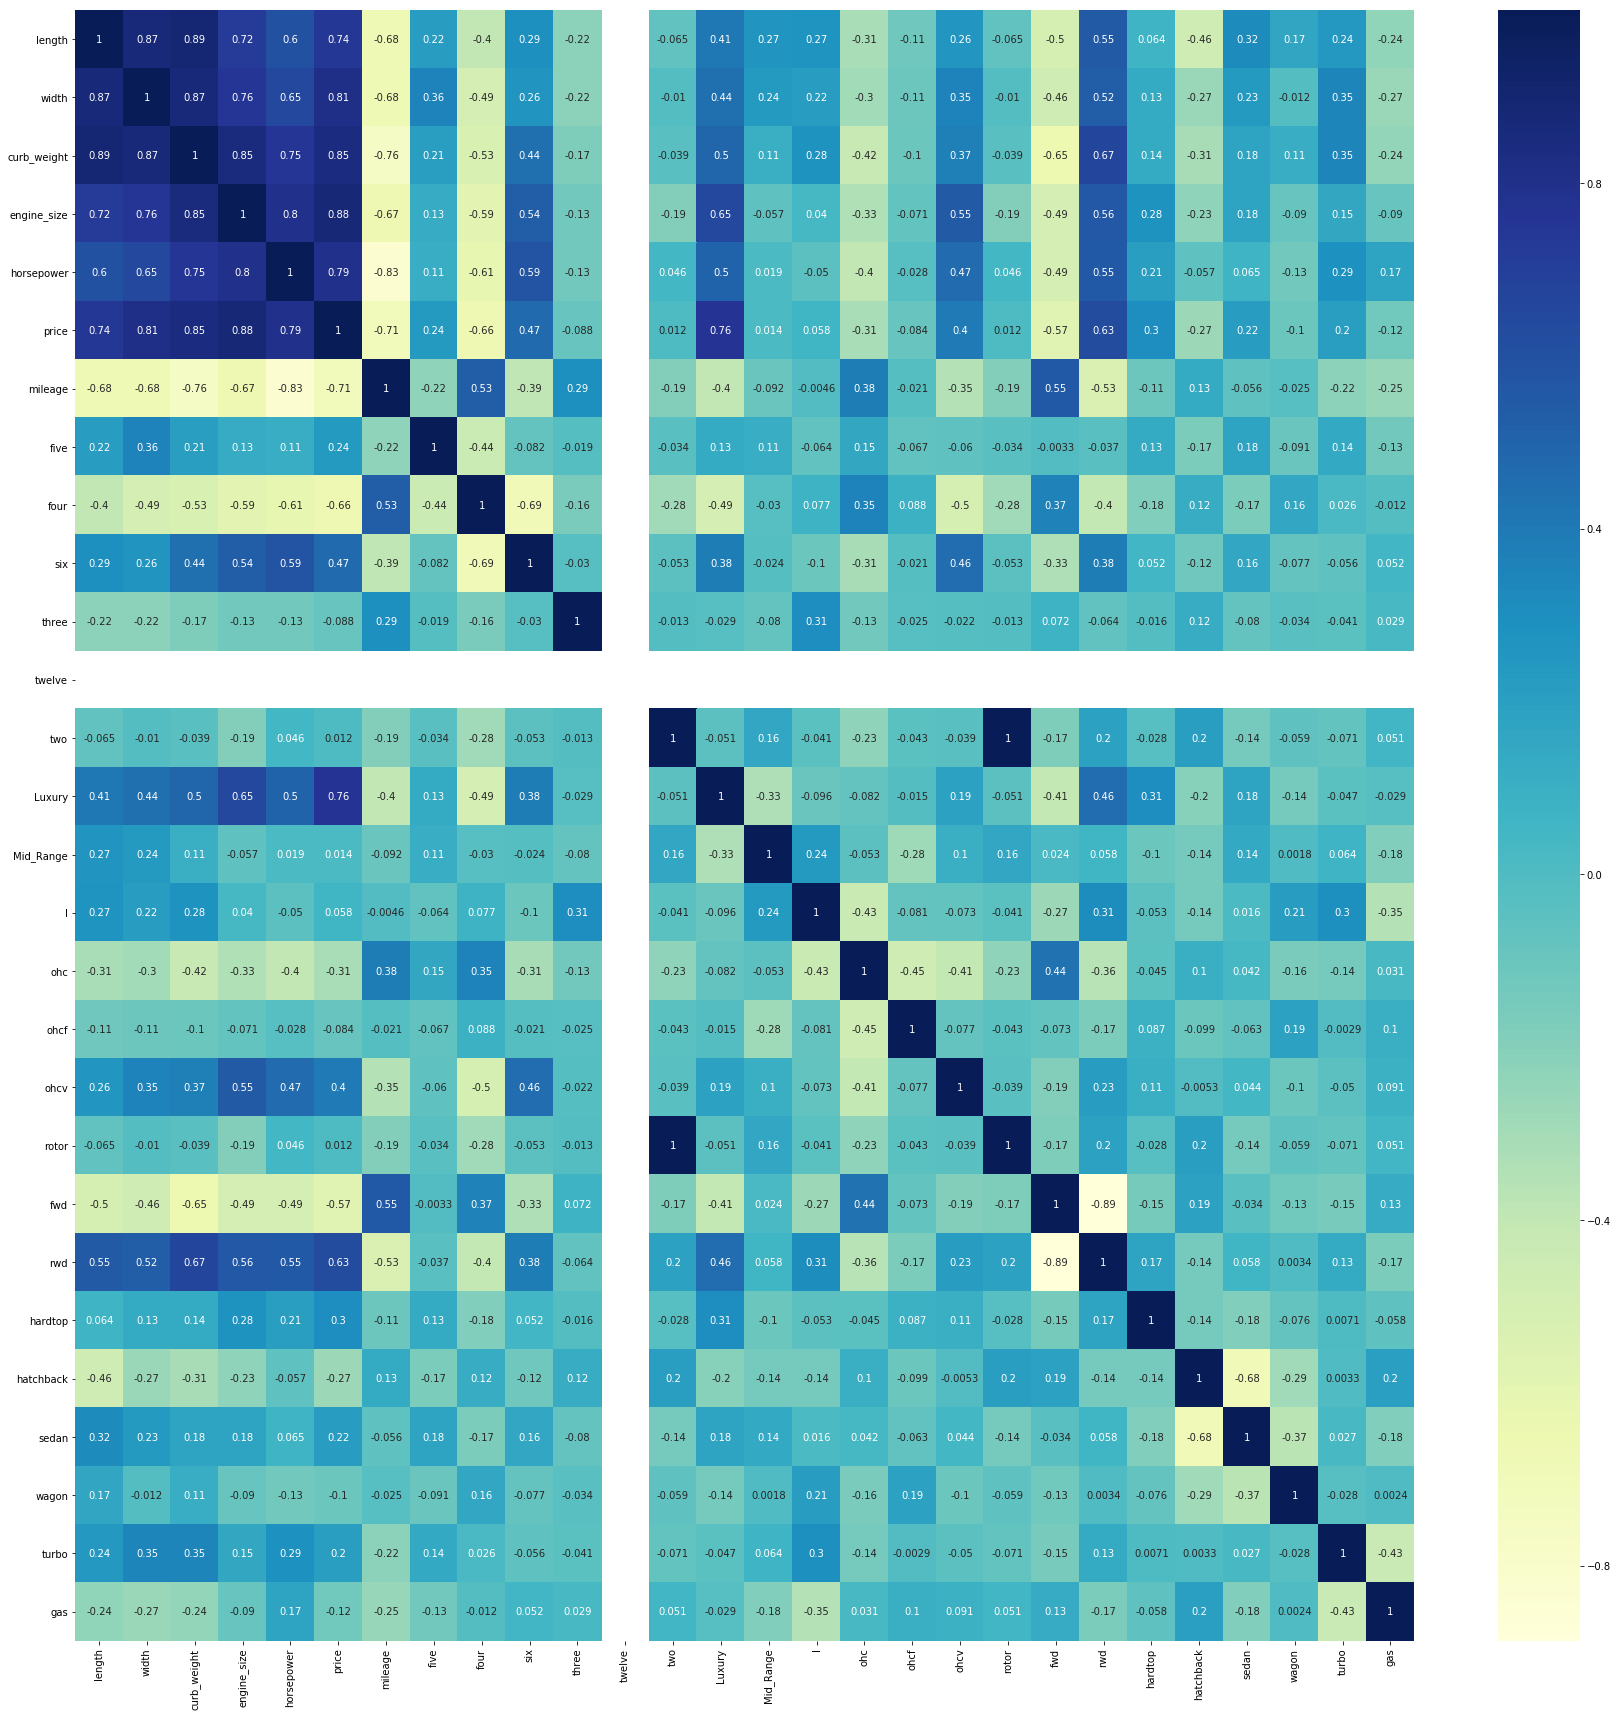

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

*__Dividing data into X and Y__*

In [54]:
xtrain=df_train.drop('price',axis=1)
ytrain=df_train['price']

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
# Representing Linear Regression as lm
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Feature Selection
#### RFE

**Recursive Feature Elimination. Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.**

In [57]:
from sklearn.feature_selection import RFE

In [58]:
#Running RFE with the output - number of variables equal to 10. 

rfe = RFE(lm,10) # n_features_to_select=10.
rfe = rfe.fit(xtrain,ytrain)

In [59]:
list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('length', False, 3),
 ('width', True, 1),
 ('curb_weight', True, 1),
 ('engine_size', False, 17),
 ('horsepower', True, 1),
 ('mileage', False, 9),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', True, 1),
 ('twelve', False, 18),
 ('two', True, 1),
 ('Luxury', True, 1),
 ('Mid_Range', False, 4),
 ('l', False, 8),
 ('ohc', False, 13),
 ('ohcf', False, 14),
 ('ohcv', False, 2),
 ('rotor', True, 1),
 ('fwd', False, 12),
 ('rwd', False, 15),
 ('hardtop', False, 11),
 ('hatchback', False, 5),
 ('sedan', False, 7),
 ('wagon', False, 6),
 ('turbo', False, 16),
 ('gas', False, 10)]

In [60]:
col=xtrain.columns[rfe.support_]
col

Index(['width', 'curb_weight', 'horsepower', 'five', 'four', 'six', 'three',
       'two', 'Luxury', 'rotor'],
      dtype='object')

In [61]:
xtrain.columns[~rfe.support_]

Index(['length', 'engine_size', 'mileage', 'twelve', 'Mid_Range', 'l', 'ohc',
       'ohcf', 'ohcv', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'gas'],
      dtype='object')

### Building Model 

**Building model using statsmodel for the detailed statistics.**

In [62]:
#Creating X_train dataframe with RFE selected variables
xtrain_rfe = xtrain[col]
xtrain_rfe.head(3)

,width,curb_weight,horsepower,five,four,six,three,two,Luxury,rotor
162,0.316239,0.314973,0.402516,0,1,0,0,0,0,0
75,0.350427,0.200155,0.125786,0,1,0,0,0,0,0
3,0.504274,0.329325,0.339623,0,1,0,0,0,0,0


In [63]:
import statsmodels.api as sm  

In [64]:
# Adding a conastant variable
xtrain_rfe= sm.add_constant(xtrain_rfe)

In [65]:
# Running the linear model
lm = sm.OLS(ytrain,xtrain_rfe).fit()

In [66]:
# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           9.32e-72
Time:                        18:17:26   Log-Likelihood:                 223.03
No. Observations:                 140   AIC:                            -426.1
Df Residuals:                     130   BIC:                            -396.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0753      0.046      1.648      

**Checking for Multicollinearity**

* Multicollinariry is explained in a way in which independent variables are correlated with each other. 
* VIF(Variance Infaltion Factor) can be used to check multicollinearity.
* VIF > 5 contains multicolinearity. 

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
#Calculating VIF for the model
vif = pd.DataFrame()
vif['Features'] = xtrain_rfe.columns
vif['VIF'] = [variance_inflation_factor(xtrain_rfe.values, i) for i in range(xtrain_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,two,inf
10,rotor,inf
0,const,112.320000
5,four,13.260000
6,six,7.060000
2,curb_weight,6.050000
1,width,5.530000
4,five,3.740000
3,horsepower,3.070000
7,three,1.790000


In [71]:
#dropping two and rotor due to high p-value and VIF
X_train_new = xtrain_rfe.drop(['two','rotor'],axis=1) 

In [72]:
#Adding a constant variable and creating a new model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(ytrain,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     214.6
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           2.13e-71
Time:                        18:23:43   Log-Likelihood:                 219.20
No. Observations:                 140   AIC:                            -420.4
Df Residuals:                     131   BIC:                            -393.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0161      0.032     -0.512      

In [73]:
#Removing three due to high p-value
X_train_new1=X_train_new.drop(['three'],axis=1)

In [75]:
#Adding a constant variable
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(ytrain,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           1.35e-72
Time:                        18:25:43   Log-Likelihood:                 219.16
No. Observations:                 140   AIC:                            -422.3
Df Residuals:                     132   BIC:                            -398.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0118      0.027     -0.440      

In [77]:
# Dropping the feature const from the dataframe
X_train_new1=X_train_new1.drop(['const'],axis=1)

In [87]:
#Since all the p-values are less than 0.05, we will check for the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,width,33.82
1,curb_weight,30.75
2,horsepower,9.75
4,four,4.89
5,six,2.45
3,five,1.73
6,Luxury,1.68


In [88]:
#Removing carwidth due to high VIF value and rebuilding the model
X_train_new2=X_train_new1.drop(['width','curb_weight'],axis=1)
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(ytrain,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           6.84e-51
Time:                        18:34:35   Log-Likelihood:                 160.66
No. Observations:                 140   AIC:                            -309.3
Df Residuals:                     134   BIC:                            -291.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1139      0.036      3.126      0.0

In [89]:
#Removing five due to high p-value
X_train_new3=X_train_new2.drop(['five'],axis=1)
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(ytrain,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           4.88e-52
Time:                        18:34:42   Log-Likelihood:                 160.66
No. Observations:                 140   AIC:                            -311.3
Df Residuals:                     135   BIC:                            -296.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1148      0.028      4.027      0.0

In [90]:
#Since all the p-values are less than 0.05, we will check for the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.00
1,four,2.29
2,six,2.09
3,Luxury,1.59


### Residual Analysis of Training Data

In [91]:
# Need to check if the errors are also normally distributed
ytrain_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

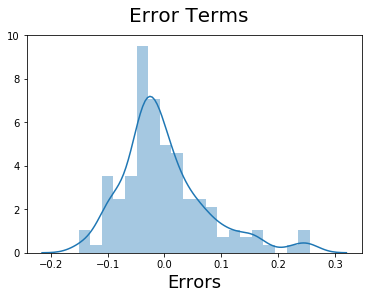

In [93]:
#Plotting distribution plot for the error terms
fig = plt.figure()
sns.distplot((ytrain - ytrain_price),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

### Making Predictions

**Scaling on Test Dataset**

In [94]:
# Scaling the test set

num_vars=['curb_weight','length','width','engine_size','horsepower','mileage','price']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [96]:
xtest=df_test.drop('price',axis=1)
ytest=df_test['price']

In [97]:
# Creating X_test_new containing only those columns which were used to train dataset
X_test_new = xtest[['horsepower','four','six','Luxury']]

In [98]:
# Adding a constant to the X test
X_test_new = sm.add_constant(X_test_new)

In [99]:
# Predicting y based on X test data set
y_pred = lm.predict(X_test_new)

In [101]:
from sklearn.metrics import r2_score

In [105]:
# Calculating r2 score between y_test and y_pred

print('R-Square :',r2_score(ytest,y_pred))

R-Square : 0.8033736410632254


## Model Evaluation

Text(0, 0.5, 'y_pred')

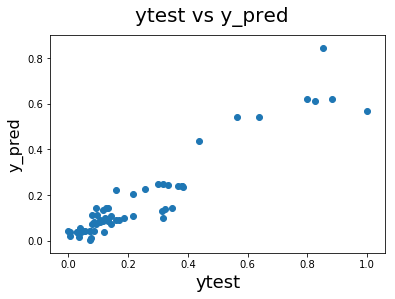

In [106]:
fig = plt.figure()
plt.scatter(ytest, y_pred)
fig.suptitle('ytest vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('ytest', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

## Result Summary

We can see that the best fitted line is provided by the equation:

**price = 0.4512horsepower - 0.1104four - 0.1013six + 0.2759Luxury + 0.1148**

**price ~ horsepower + four_cylinders + six_cylinders + brand_category(Luxury)**

**This model captured 80% of total variance in price.**
